In [1]:
import geojson
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import cmocean
import cartopy
import cartopy.crs as ccrs
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker
import cartopy.mpl.ticker as cartopyticker
lon_formatter = cartopyticker.LongitudeFormatter()
lat_formatter = cartopyticker.LatitudeFormatter()
import hikinggc
from matplotlib.font_manager import FontProperties
fontfile = "/home/ctroupin/.fonts/D-DIN.ttf"
myfont = FontProperties(fname=fontfile)
fa_dir = r"/home/ctroupin/Downloads/fontawesome-free-5.0.13/use-on-desktop/"
fp1 = FontProperties(fname=os.path.join(fa_dir, "Font Awesome 5 Free-Solid-900.otf"))

In [2]:
domain = [8.6521, 8.7915, 42.5351, 42.6097]
bbox = [8.65, 8.8, 42.53, 42.61]
dx = 0.05
dy = 0.05
Dom = hikinggc.Island(bbox=domain)
figdir = "../figures/Calvi"

In [3]:
with netCDF4.Dataset("../Data/Calvi.nc", "r") as nc:
    lonb = nc.variables["lon"][:]
    latb = nc.variables["lat"][:]
    bat = nc.variables["bat"][:]
bat = np.ma.masked_where(bat > 0., bat)

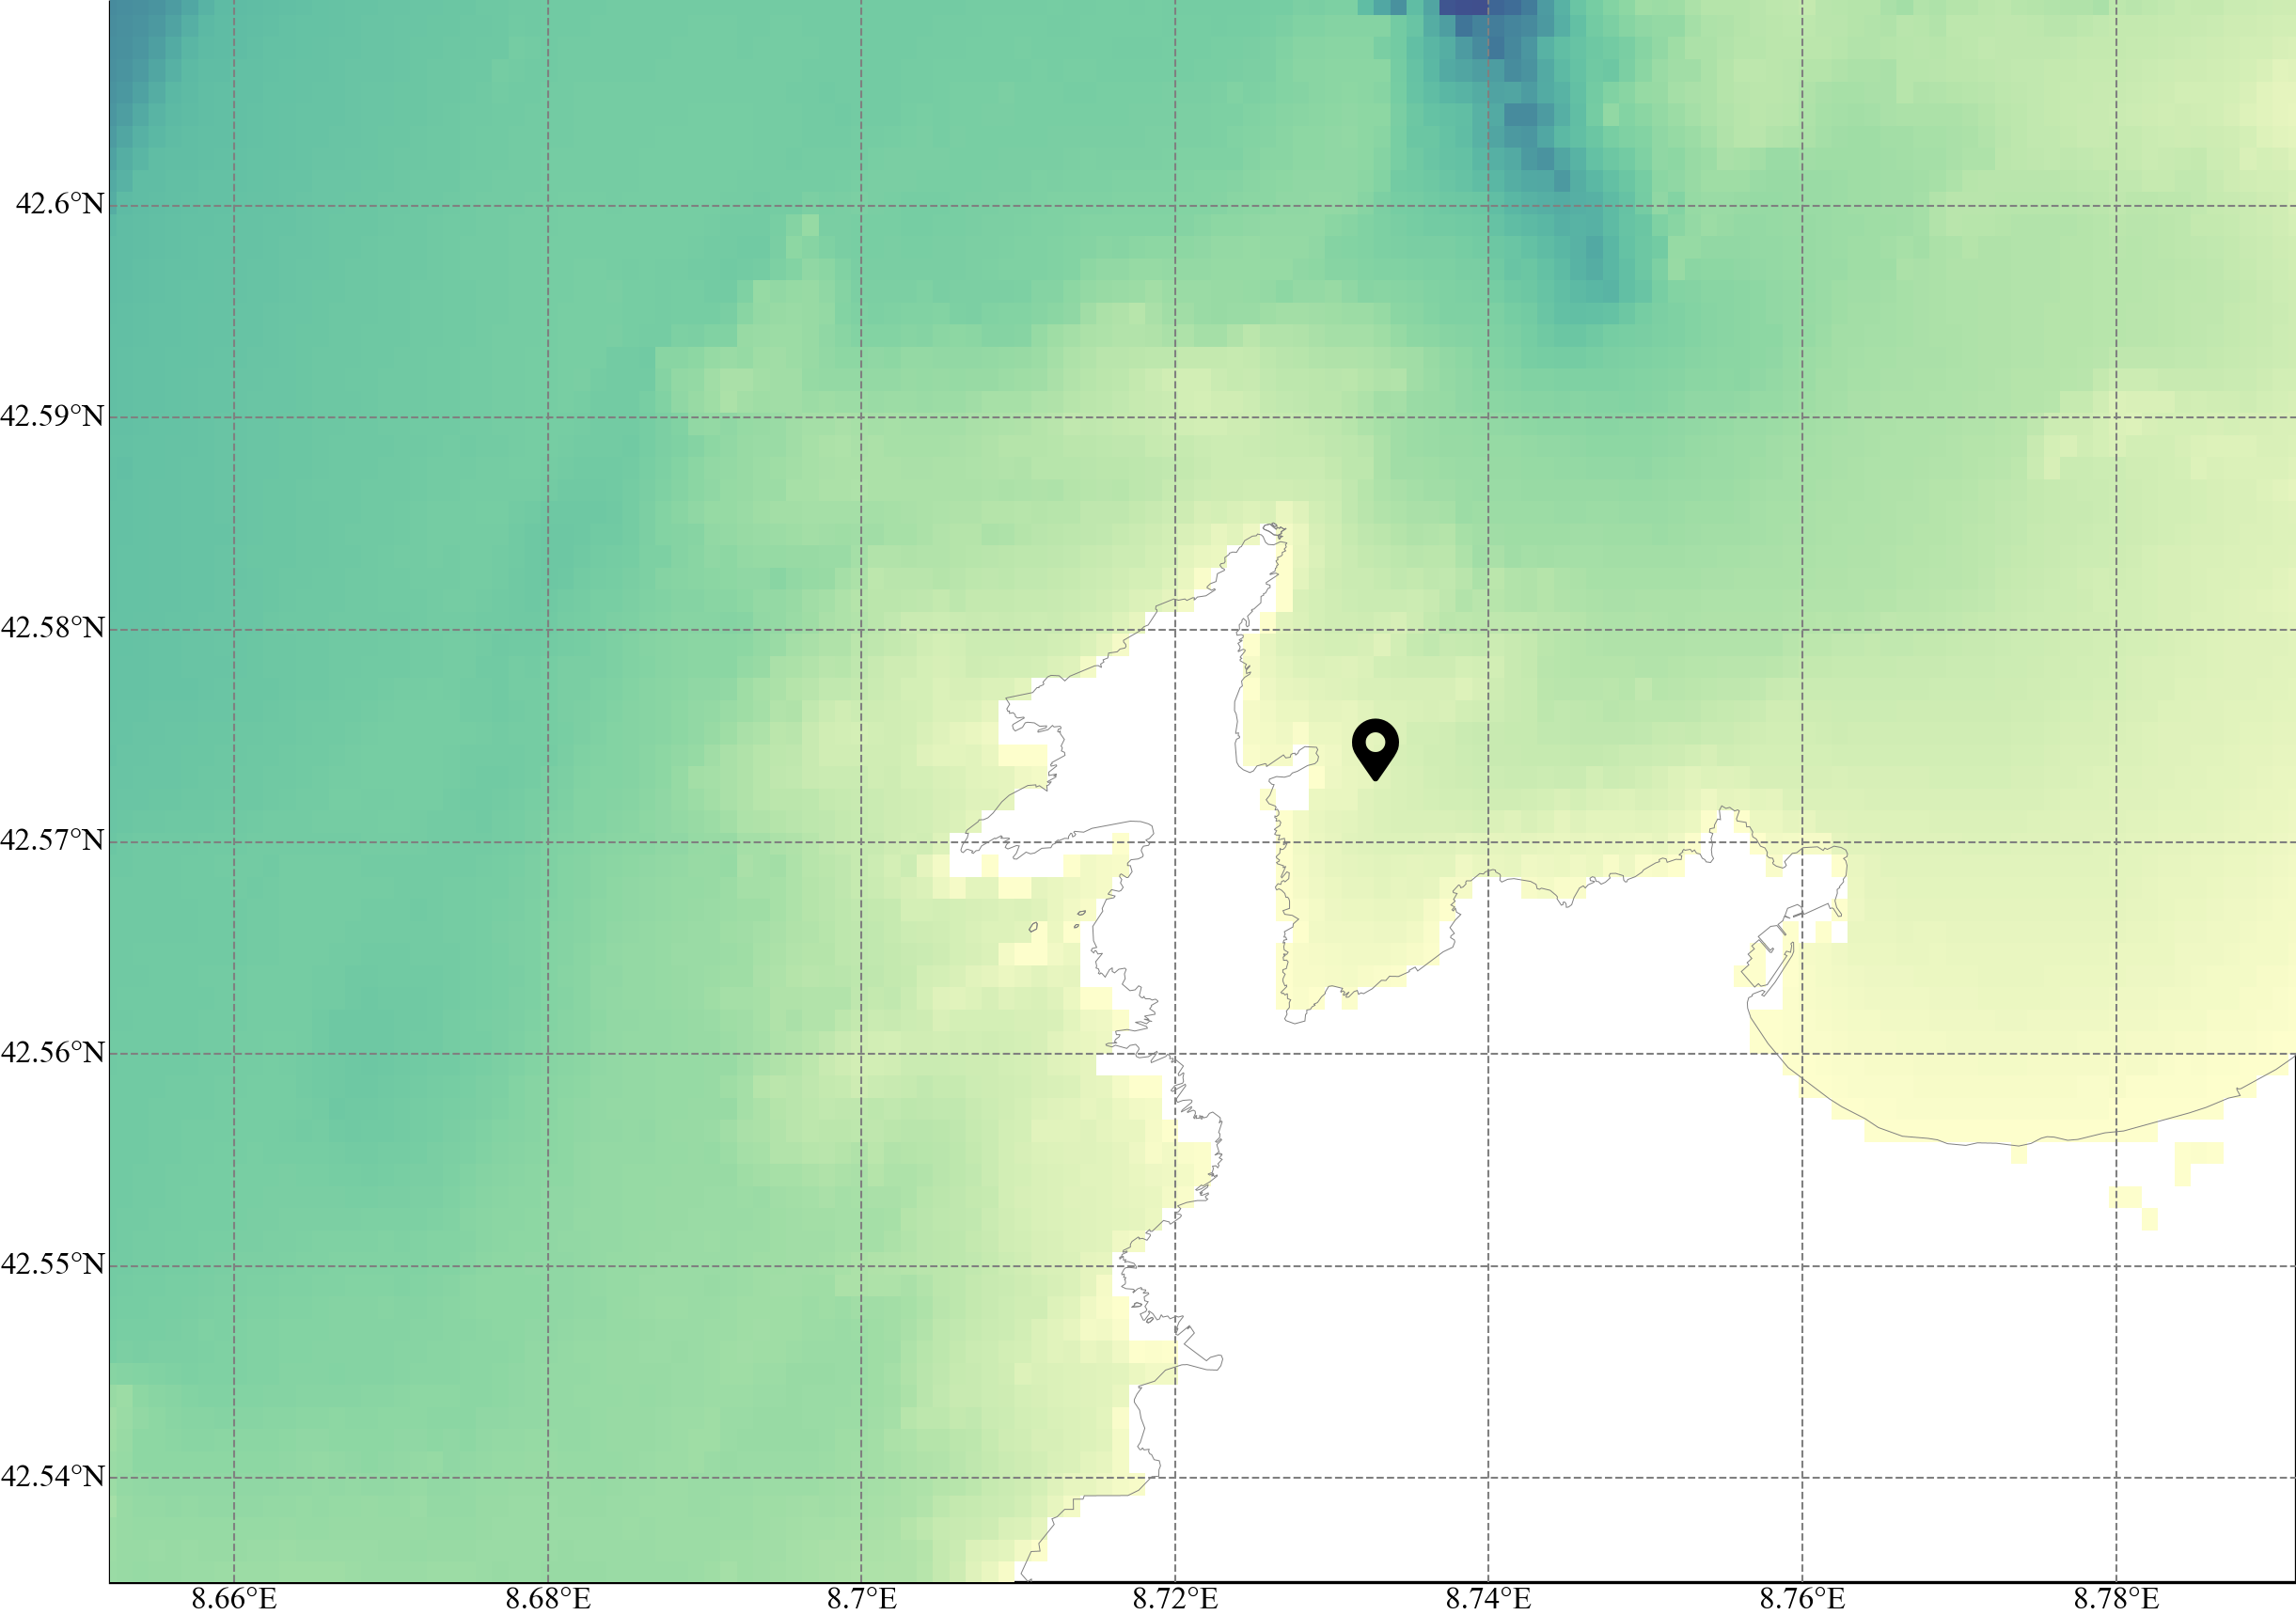

In [4]:
fig = plt.figure()
ax = plt.subplot(111, projection=Dom.proj)
ax.set_extent(domain)

ax.plot(8.72425, 42.58029, transform=ccrs.PlateCarree())
ax.pcolormesh(lonb, latb, bat, vmax=0, vmin=-500., transform=ccrs.PlateCarree(), 
              cmap=cmocean.cm.deep_r, zorder=4)
ax.add_wms(wms='http://ows.emodnet-bathymetry.eu/wms', layers=['coastlines', ], zorder=6)
ax.text(8.7328, 42.5729, "\uf3c5", fontproperties=fp1, transform=ccrs.PlateCarree(),
        fontsize=16, ha="center", va="bottom", zorder=7, color="k")

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, zorder=5,
                      linewidth=.5, color="gray", alpha=1, linestyle="--")


gl.top_labels = False
gl.right_labels = False
    
plt.savefig(os.path.join(figdir, "calvi01.png"), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

In [5]:
np.arange(bbox[0], bbox[1], dx)

array([8.65, 8.7 , 8.75, 8.8 ])